In [1]:
# Бібліотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Завантаження даних
transaction_data = pd.read_excel(r'C:\Users\BOSS\Desktop\DATA\python_folder\poject_1\QVI_transaction_data.xlsx')
customer_data = pd.read_csv(r'C:\Users\BOSS\Desktop\DATA\python_folder\poject_1\QVI_purchase_behaviour.csv')


In [2]:
# Огляд даних
print(transaction_data.head())
print(transaction_data.info())

# Перетворення стовпця з датами
transaction_data['DATE'] = pd.to_datetime(transaction_data['DATE'], origin='1899-12-30', unit='D')


    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   ST

In [3]:
print(transaction_data.head())

        DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1            1000       1         5   
1 2019-05-14          1            1307     348        66   
2 2019-05-20          1            1343     383        61   
3 2018-08-17          2            2373     974        69   
4 2018-08-18          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  


In [4]:
# Видалення salsa-продуктів
transaction_data = transaction_data[~transaction_data['PROD_NAME'].str.contains('salsa', case=False)]


In [5]:
# Пошук аномальних транзакцій
outliers = transaction_data[transaction_data['PROD_QTY'] > 100]
print(outliers)

# Видалення цих записів
transaction_data = transaction_data[transaction_data['PROD_QTY'] <= 100]


            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  


In [6]:
# Визначення розміру упаковки
transaction_data['PACK_SIZE'] = transaction_data['PROD_NAME'].str.extract('(\d+)').astype(int)

# Визначення бренду
transaction_data['BRAND'] = transaction_data['PROD_NAME'].str.split().str[0]

# Очищення брендів (за потреби)
transaction_data['BRAND'] = transaction_data['BRAND'].replace({'RED': 'RRD'})


In [8]:
# Об'єднання з даними клієнтів
merged_data = pd.merge(transaction_data, customer_data, on='LYLTY_CARD_NBR', how='left')

# Перевірка на наявність порожніх значень після об'єднання
print(merged_data.isnull().sum())


DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


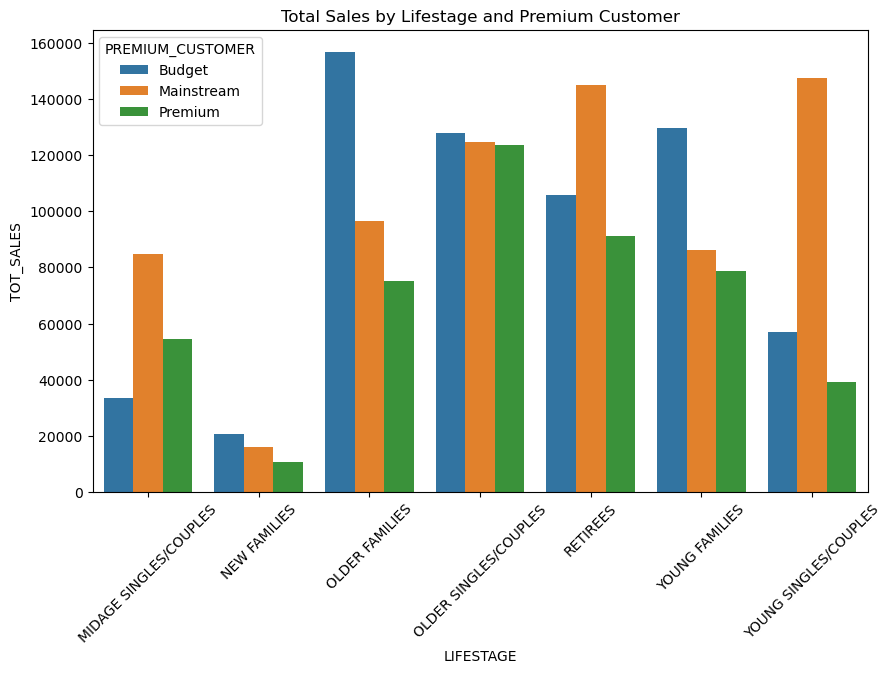

In [12]:
# Групування за сегментами
sales_by_segment = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

# Візуалізація
plt.figure(figsize=(10, 6))
sns.barplot(x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER', data=sales_by_segment)
plt.title('Total Sales by Lifestage and Premium Customer')
plt.xticks(rotation=45)
plt.show()


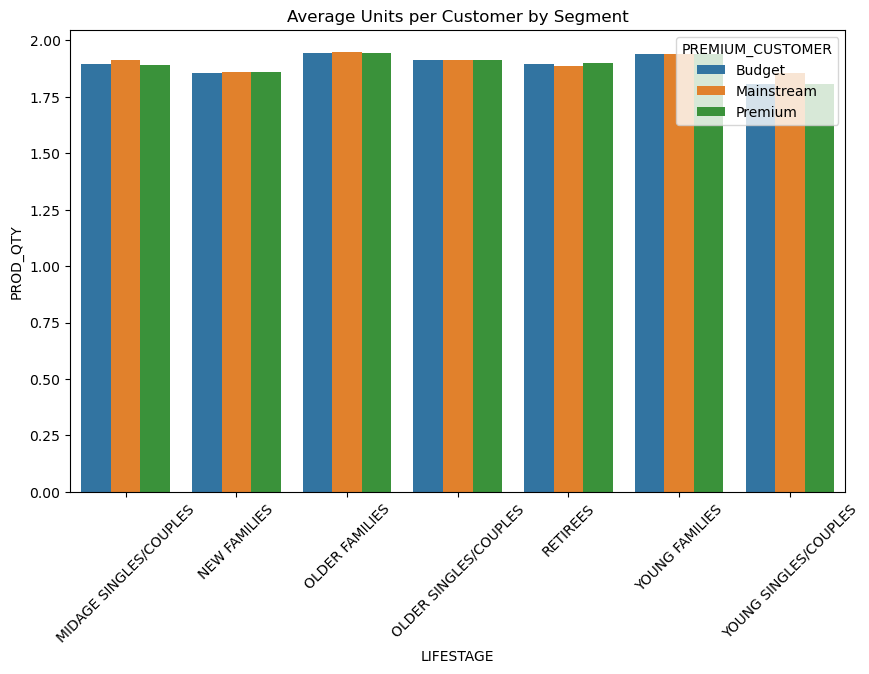

In [13]:
# Групування для аналізу кількості покупок
avg_units_per_customer = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].mean().reset_index()

# Візуалізація
plt.figure(figsize=(10, 6))
sns.barplot(x='LIFESTAGE', y='PROD_QTY', hue='PREMIUM_CUSTOMER', data=avg_units_per_customer)
plt.title('Average Units per Customer by Segment')
plt.xticks(rotation=45)
plt.show()


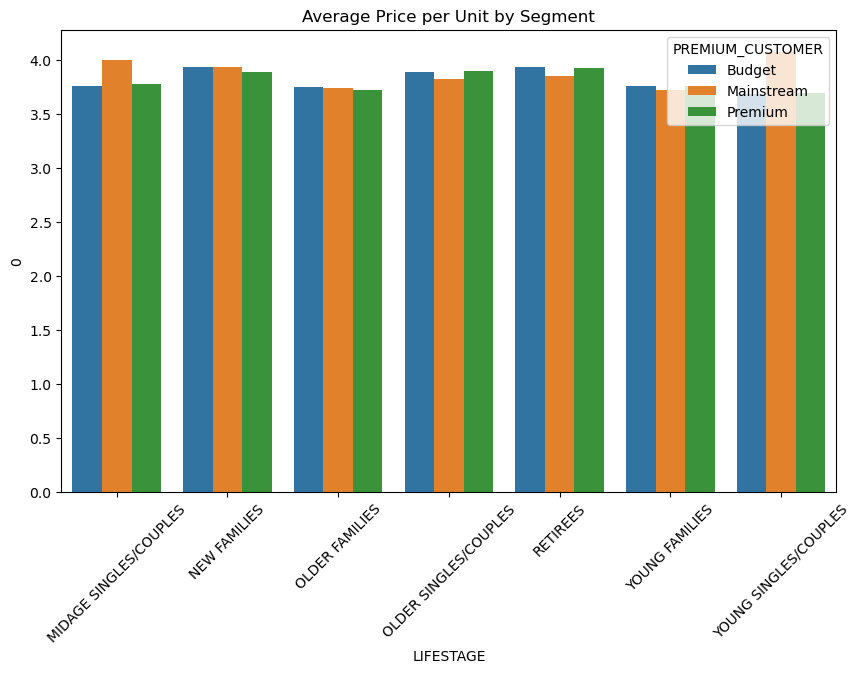

In [14]:
# Групування для аналізу середньої ціни
avg_price_per_unit = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum() / merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum()

# Візуалізація
avg_price_per_unit = avg_price_per_unit.reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='LIFESTAGE', y=0, hue='PREMIUM_CUSTOMER', data=avg_price_per_unit)
plt.title('Average Price per Unit by Segment')
plt.xticks(rotation=45)
plt.show()


In [15]:
from scipy.stats import ttest_ind

# t-тест між двома групами (наприклад, між основними і преміальними покупцями)
mainstream_customers = merged_data[merged_data['PREMIUM_CUSTOMER'] == 'Mainstream']['TOT_SALES'] / merged_data[merged_data['PREMIUM_CUSTOMER'] == 'Mainstream']['PROD_QTY']
premium_customers = merged_data[merged_data['PREMIUM_CUSTOMER'] == 'Premium']['TOT_SALES'] / merged_data[merged_data['PREMIUM_CUSTOMER'] == 'Premium']['PROD_QTY']

t_stat, p_value = ttest_ind(mainstream_customers, premium_customers)

print(f'T-statistic: {t_stat}, P-value: {p_value}')


T-statistic: 11.096115580393358, P-value: 1.3420572458727282e-28


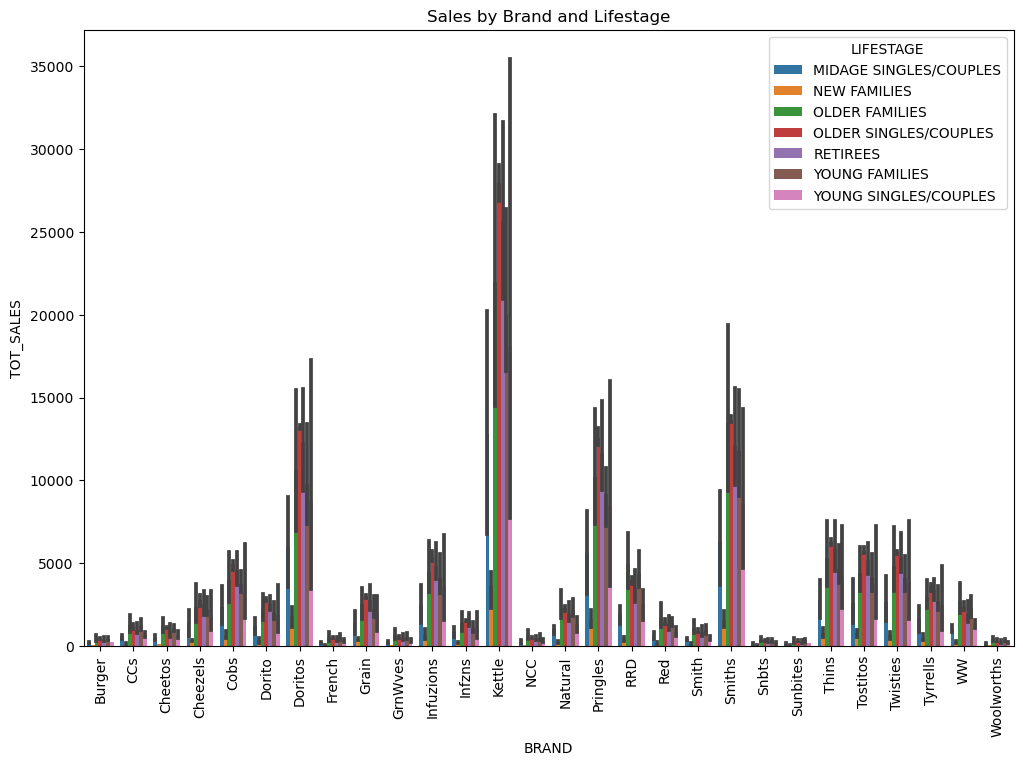

In [16]:
# Групування продажів за брендами і сегментами
sales_by_brand = merged_data.groupby(['BRAND', 'LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

# Візуалізація продажів за брендами та сегментами
plt.figure(figsize=(12, 8))
sns.barplot(x='BRAND', y='TOT_SALES', hue='LIFESTAGE', data=sales_by_brand)
plt.title('Sales by Brand and Lifestage')
plt.xticks(rotation=90)
plt.show()


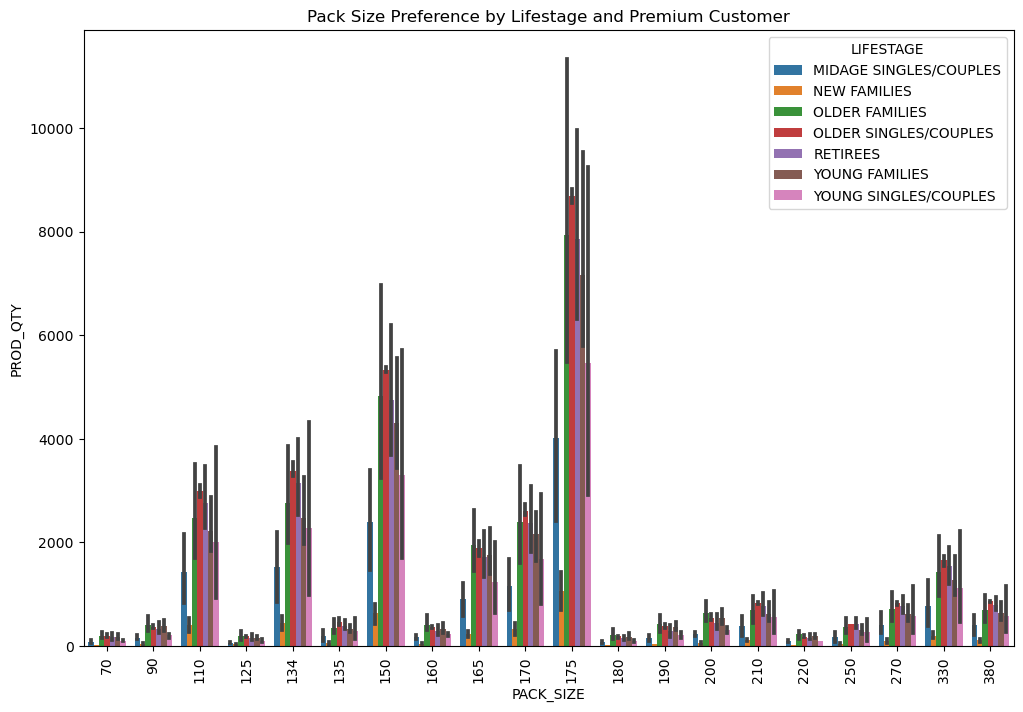

In [17]:
# Групування за розміром упаковки і сегментами
pack_size_preference = merged_data.groupby(['PACK_SIZE', 'LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum().reset_index()

# Візуалізація
plt.figure(figsize=(12, 8))
sns.barplot(x='PACK_SIZE', y='PROD_QTY', hue='LIFESTAGE', data=pack_size_preference)
plt.title('Pack Size Preference by Lifestage and Premium Customer')
plt.xticks(rotation=90)
plt.show()


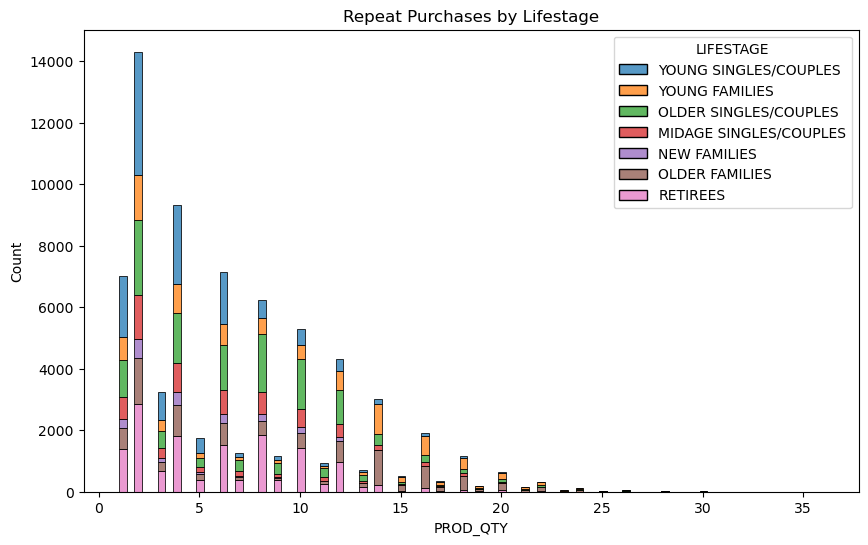

In [20]:
# Підрахунок кількості покупок на одного клієнта
repeat_purchases = merged_data.groupby('LYLTY_CARD_NBR')['PROD_QTY'].sum().reset_index()

# Додаємо сегментацію для візуалізації
repeat_purchases = pd.merge(repeat_purchases, customer_data, on='LYLTY_CARD_NBR', how='left')

# Візуалізація повторних покупок по сегментах
plt.figure(figsize=(10, 6))
sns.histplot(data=repeat_purchases, x='PROD_QTY', hue='LIFESTAGE', multiple='stack')
plt.title('Repeat Purchases by Lifestage')
plt.show()


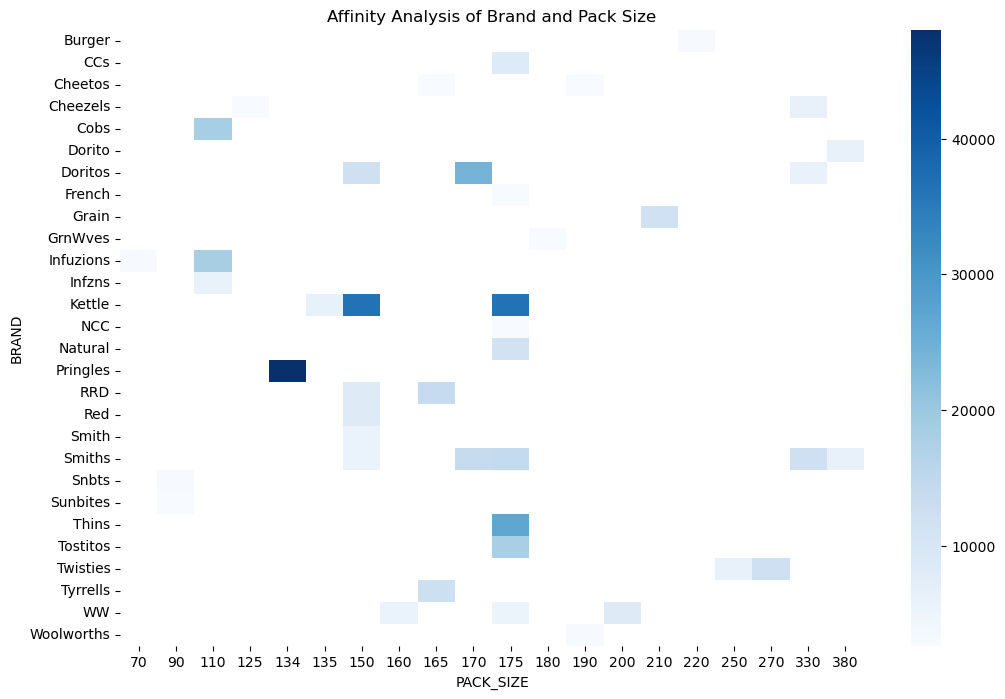

In [25]:
# Affinity analysis: підрахунок частоти покупок певних брендів і упаковок
affinity = merged_data.groupby(['BRAND', 'PACK_SIZE'])['PROD_QTY'].sum().reset_index()

# Візуалізація результатів афінті-аналізу
plt.figure(figsize=(12, 8))

# Виправлення методу pivot
affinity_pivot = affinity.pivot(index='BRAND', columns='PACK_SIZE', values='PROD_QTY')

# Візуалізація теплової карти
sns.heatmap(affinity_pivot, cmap='Blues', annot=False)
plt.title('Affinity Analysis of Brand and Pack Size')
plt.show()
